In [1]:
import pandas as pd

In [1]:
import numpy as np


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
import keras

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1/255, horizontal_flip=True,
    vertical_flip=True,rotation_range=20,
    width_shift_range=0.5,
    height_shift_range=0.5)

In [8]:
test_datagen=ImageDataGenerator(rescale=1/255)

In [2]:
train=pd.read_csv('digit-recognizer/train mnist num.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [48]:
pd.isnull(train).sum().sort_values()

label       0
pixel516    0
pixel517    0
pixel518    0
pixel519    0
           ..
pixel263    0
pixel264    0
pixel265    0
pixel267    0
pixel783    0
Length: 785, dtype: int64

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\ANIKAIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

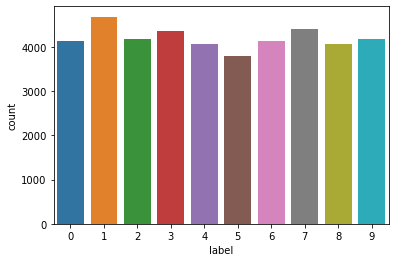

In [52]:
sns.countplot(train.label)

In [4]:
X_train=train.drop('label',axis=1)

In [5]:
y_train=train.label

In [56]:
test=pd.read_csv('digit-recognizer/test mnist num.csv')

In [59]:
X_test=test


In [6]:
X_train=X_train/255
X_test=X_test/255

In [7]:
X_train=X_train.values.reshape(42000,28,28,1)

In [72]:
X_test=X_test.values.reshape(-1,28,28,1)

In [74]:
import tensorflow as tf

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train=to_categorical(y_train)

In [82]:
from keras.callbacks import EarlyStopping

In [10]:
y_train.shape

(42000, 10)

In [83]:
es=EarlyStopping( monitor='val_loss',patience=10)

In [89]:
import kerastuner
from keras.layers import Conv2D,Dense,Dropout,MaxPool2D,Flatten
from keras.models import Sequential

In [12]:
def model(hp):
    cnn=Sequential()
    cnn.add(Conv2D(filters=hp.Int('conv1',min_value=32,max_value=128,step=16)
                   ,kernel_size=hp.Choice('ks1',[3,5]),activation='relu',input_shape=(28,28,1)))
    cnn.add(Conv2D(filters=hp.Int('conv1',min_value=32,max_value=128,step=16)
                   ,kernel_size=hp.Choice('ks1',[3,5]),activation='relu'))
    cnn.add(MaxPool2D(pool_size=2))
    cnn.add(Flatten())
    cnn.add(Dropout(0.25))
    cnn.add(Dense(units=hp.Int('dense1',min_value=50,max_value=250,step=15),activation='relu'))
    cnn.add(Dropout(0.25))
    cnn.add(Dense(10,activation='softmax'))
    cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return cnn
            
    
            

In [92]:
from kerastuner import RandomSearch

In [98]:
tuner=RandomSearch(model,objective='val_accuracy',max_trials=6)


In [94]:
from kerastuner.engine.hyperparameters import HyperParameters

In [100]:
tuner.search(X_train,y_train,epochs=3,validation_split=0.2)

Trial 7 Complete [00h 07m 58s]
val_accuracy: 0.9892857074737549

Best val_accuracy So Far: 0.9892857074737549
Total elapsed time: 01h 01m 14s
INFO:tensorflow:Oracle triggered exit


In [103]:
model=tuner.get_best_models(num_models=1)[0]

In [105]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 80)        2080      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 80)        160080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 80)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 170)               1360170   
_________________________________________________________________
dropout_1 (Dropout)          (None, 170)               0

In [106]:
model.fit(x=X_train,y=y_train,batch_size=32,epochs=300,validation_split=0.2,callbacks=es,initial_epoch=3)

Epoch 4/300
1050/1050 [==============================] - 166s 158ms/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0473 - val_accuracy: 0.9867
Epoch 5/300
1050/1050 [==============================] - 163s 155ms/step - loss: 0.0277 - accuracy: 0.9911 - val_loss: 0.0415 - val_accuracy: 0.9890
Epoch 6/300
1050/1050 [==============================] - 177s 168ms/step - loss: 0.0196 - accuracy: 0.9941 - val_loss: 0.0426 - val_accuracy: 0.9890
Epoch 7/300
1050/1050 [==============================] - 172s 164ms/step - loss: 0.0168 - accuracy: 0.9942 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 8/300
1050/1050 [==============================] - 170s 162ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0467 - val_accuracy: 0.9893
Epoch 9/300
1050/1050 [==============================] - 170s 162ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0465 - val_accuracy: 0.9894
Epoch 10/300
1050/1050 [==============================] - 173s 165ms/step - loss: 0.0104 - accuracy: 0.996

In [110]:
pre=model.predict(X_test)

In [111]:
pre.shape

(28000, 10)

In [112]:
results = np.argmax(pre,axis = 1)

In [114]:
results = pd.Series(results,name="Label")

In [117]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)

In [127]:
model.predict(X_test[0].reshape(1,28,28,1))

array([[3.20570817e-21, 4.49823584e-22, 1.00000000e+00, 1.03919095e-19,
        1.28624362e-19, 4.15129962e-27, 2.61949004e-20, 4.10962110e-21,
        2.12562673e-22, 1.08164089e-16]], dtype=float32)

In [129]:
y_train.shape

(42000, 10)

In [130]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [131]:
pre

array([[3.2057082e-21, 4.4982187e-22, 1.0000000e+00, ..., 4.1095896e-21,
        2.1256106e-22, 1.0816368e-16],
       [1.0000000e+00, 3.8919611e-23, 1.0590341e-16, ..., 2.5344738e-13,
        1.8801163e-20, 3.0859869e-18],
       [7.6483704e-21, 1.6745488e-16, 7.2396336e-17, ..., 9.3555389e-12,
        1.1729820e-11, 9.9999940e-01],
       ...,
       [4.1298417e-31, 2.9569507e-25, 3.1154288e-32, ..., 7.0246131e-24,
        4.0533708e-20, 7.9593645e-21],
       [1.9928202e-18, 8.4700674e-17, 3.1589776e-17, ..., 1.7803364e-13,
        2.6189610e-12, 1.0000000e+00],
       [2.7344375e-27, 1.9152490e-25, 1.0000000e+00, ..., 6.1671354e-27,
        3.2555150e-24, 3.3874176e-19]], dtype=float32)

In [132]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

(28000, 784)